# TFsTactics: Applying Statistics to Teamfight Tactics 

### There have been many attempts to create "Best Champions" lists for Teamfight Tactics based on statistics, but I believe most of the ones out there lack a solid mathematical foundation. Here I attempt to start a discussion about the problem with those existing statistics and try to find solutions and possible new approaches.

In [284]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### I created this dataframe by aggregating raw data from [Riot's API](https://developer.riotgames.com/), which provides historical data on [Teamfight Tactics](https://teamfighttactics.leagueoflegends.com/) matches. There's a lot of specifics, but basically this is how you should interpret it:

### • df_count: The value '68308' at row 'total' and column '40' means that there were 68,308 players that finished the game on round 40 (either winning or losing). The value '23925' at row 'Gnar' and column '40' means that (out of those 68,308), 23,925 players had Gnar as one of their units. (Note: during aggregation, I filtered out compositions with duplicate units, which means that, more precisely, the player had exactly one Gnar)

### • df_avg_place: The value '1.842288' at row 'total' and column '40' means that players that finished the game on round 40 placed on average at 1.84 (between 1st and 2nd place). The value '2.046715'  at row 'KogMaw' and column '40' means that players that finished the game on round 40 *and also* had KogMaw as one of their units placed on average at 2.05 (close to 2nd place).

In [299]:
with open('./champion_round_base_analysis.json') as f:
    data = json.load(f)
    
df = pd.DataFrame(data).sort_index(axis=1).sort_index()

df.head()

,12,13,14,16,17,19,20,21,23,24,26,27,28,30,31,33,34,35,37,38,40,41,42,44,45,47,48,49,51,total
Ahri,"{'count': 8, 'avg_place': 8.0}","{'count': 15, 'avg_place': 8.0}","{'count': 22, 'avg_place': 7.954545454545454}","{'count': 16, 'avg_place': 8.0}","{'count': 34, 'avg_place': 8.0}","{'count': 72, 'avg_place': 8.0}","{'count': 209, 'avg_place': 7.985645933014354}","{'count': 519, 'avg_place': 7.973025048169557}","{'count': 1010, 'avg_place': 7.90990099009901}","{'count': 1882, 'avg_place': 7.815090329436769}","{'count': 5018, 'avg_place': 7.668991630131527}","{'count': 8141, 'avg_place': 7.37992875568112}","{'count': 11056, 'avg_place': 6.986342257597684}","{'count': 12419, 'avg_place': 6.441178838875916}","{'count': 13464, 'avg_place': 5.865790255496138}","{'count': 19325, 'avg_place': 5.113428201811126}","{'count': 17851, 'avg_place': 4.139544003137079}","{'count': 16359, 'avg_place': 3.183629806222874}","{'count': 14606, 'avg_place': 2.4093523209639875}","{'count': 11605, 'avg_place': 2.02585092632486}","{'count': 8173, 'avg_place': 1.8733635140095437}","{'count': 3671, 'avg_place': 1.7679106510487606}","{'count': 1645, 'avg_place': 1.6613981762917933}","{'count': 619, 'avg_place': 1.5654281098546041}","{'count': 220, 'avg_place': 1.5}","{'count': 66, 'avg_place': 1.4545454545454546}","{'count': 18, 'avg_place': 1.5}","{'count': 2, 'avg_place': 1.5}",NaN,"{'count': 148045, 'avg_place': 4.553115606741193}"
Annie,"{'count': 4, 'avg_place': 8.0}","{'count': 6, 'avg_place': 8.0}","{'count': 4, 'avg_place': 8.0}","{'count': 9, 'avg_place': 8.0}","{'count': 21, 'avg_place': 8.0}","{'count': 46, 'avg_place': 7.978260869565218}","{'count': 158, 'avg_place': 7.962025316455696}","{'count': 397, 'avg_place': 7.959697732997481}","{'count': 809, 'avg_place': 7.911001236093943}","{'count': 1527, 'avg_place': 7.8068107400130975}","{'count': 4199, 'avg_place': 7.65301262205287}","{'count': 7229, 'avg_place': 7.351362567436714}","{'count': 10038, 'avg_place': 6.933950986252241}","{'count': 11642, 'avg_place': 6.386445627898986}","{'count': 12811, 'avg_place': 5.795176020607291}","{'count': 18865, 'avg_place': 5.0218923933209645}","{'count': 17754, 'avg_place': 4.087304269460403}","{'count': 16012, 'avg_place': 3.1936672495628278}","{'count': 14065, 'avg_place': 2.457163170991824}","{'count': 10962, 'avg_place': 2.073982849844919}","{'count': 7612, 'avg_place': 1.934445612191277}","{'count': 3278, 'avg_place': 1.8212324588163515}","{'count': 1502, 'avg_place': 1.674434087882823}","{'count': 549, 'avg_place': 1.615664845173042}","{'count': 222, 'avg_place': 1.5135135135135136}","{'count': 68, 'avg_place': 1.4705882352941178}","{'count': 17, 'avg_place': 1.6470588235294117}",NaN,NaN,"{'count': 139806, 'avg_place': 4.4864240447477..."
Ashe,"{'count': 4, 'avg_place': 8.0}","{'count': 13, 'avg_place': 8.0}","{'count': 15, 'avg_place': 8.0}","{'count': 22, 'avg_place': 8.0}","{'count': 38, 'avg_place': 8.0}","{'count': 93, 'avg_place': 8.0}","{'count': 314, 'avg_place': 7.987261146496815}","{'count': 766, 'avg_place': 7.941253263707572}","{'count': 1592, 'avg_place': 7.892587939698492}","{'count': 2848, 'avg_place': 7.814957865168539}","{'count': 6972, 'avg_place': 7.631669535283993}","{'count': 11241, 'avg_place': 7.337158615781514}","{'count': 14108, 'avg_place': 6.914870995180039}","{'count': 16200, 'avg_place': 6.375246913580247}","{'count': 17448, 'avg_place': 5.795048143053645}","{'count': 25190, 'avg_place': 5.04013497419611}","{'count': 23454, 'avg_place': 4.093331627867315}","{'count': 21832, 'avg_place': 3.1640252839868084}","{'count': 20207, 'avg_place': 2.3740288019003315}","{'count': 16501, 'avg_place': 1.9793345857826798}","{'count': 12144, 'avg_place': 1.8302042160737813}","{'count': 5801, 'avg_place': 1.7276331666953972}","{'count': 2579, 'avg_place': 1.6211709965102754}","{'count': 1102, 'avg_place': 1.5490018148820326}","{'count': 424, 'avg_place': 1.4882075471698113}","{'count': 111, 'avg_place': 1.4954954954954955}","{'count': 25

In [300]:
# Number of comps that include a given unit, by round
df_count = df.applymap(lambda x: x['count'] if isinstance(x, dict) else 0)

df_count.head()

,12,13,14,16,17,19,20,21,23,24,26,27,28,30,31,33,34,35,37,38,40,41,42,44,45,47,48,49,51,total
Ahri,8,15,22,16,34,72,209,519,1010,1882,5018,8141,11056,12419,13464,19325,17851,16359,14606,11605,8173,3671,1645,619,220,66,18,2,0,148045
Annie,4,6,4,9,21,46,158,397,809,1527,4199,7229,10038,11642,12811,18865,17754,16012,14065,10962,7612,3278,1502,549,222,68,17,0,0,139806
Ashe,4,13,15,22,38,93,314,766,1592,2848,6972,11241,14108,16200,17448,25190,23454,21832,20207,16501,12144,5801,2579,1102,424,111,25,8,0,201052
AurelionSol,0,0,0,0,0,0,16,67,317,671,2210,4048,5912,8445,10088,17845,19277,20527,21332,17855,13887,6601,3082,1321,531,153,34,4,0,154223
Bard,7,15,31,30,47,143,422,964,1644,2446,5202,7139,8690,8826,8438,10038,7852,6332,4777,3330,2087,875,346,138,57,14,4,1,0,79895


In [301]:
# Average placement of players that used a given unit, by round
df_avg_place = df.applymap(lambda x: x['avg_place'] if isinstance(x, dict) else np.nan)

df_avg_place.head()

,12,13,14,16,17,19,20,21,23,24,26,27,28,30,31,33,34,35,37,38,40,41,42,44,45,47,48,49,51,total
Ahri,8.0,8.0,7.954545,8.0,8.0,8.000000,7.985646,7.973025,7.909901,7.815090,7.668992,7.379929,6.986342,6.441179,5.865790,5.113428,4.139544,3.183630,2.409352,2.025851,1.873364,1.767911,1.661398,1.565428,1.500000,1.454545,1.500000,1.500,NaN,4.553116
Annie,8.0,8.0,8.000000,8.0,8.0,7.978261,7.962025,7.959698,7.911001,7.806811,7.653013,7.351363,6.933951,6.386446,5.795176,5.021892,4.087304,3.193667,2.457163,2.073983,1.934446,1.821232,1.674434,1.615665,1.513514,1.470588,1.647059,NaN,NaN,4.486424
Ashe,8.0,8.0,8.000000,8.0,8.0,8.000000,7.987261,7.941253,7.892588,7.814958,7.631670,7.337159,6.914871,6.375247,5.795048,5.040135,4.093332,3.164025,2.374029,1.979335,1.830204,1.727633,1.621171,1.549002,1.488208,1.495495,1.400000,1.625,NaN,4.447511
AurelionSol,NaN,NaN,NaN,NaN,NaN,NaN,7.875000,7.970149,7.867508,7.824143,7.665158,7.358943,6.939445,6.412670,5.782514,4.990978,3.967837,2.975350,2.251781,1.896948,1.791388,1.713377,1.628812,1.558668,1.519774,1.542484,1.500000,1.250,NaN,3.641124
Bard,8.0,8.0,7.935484,8.0,8.0,7.993007,7.971564,7.948133,7.892944,7.825838,7.642830,7.334361,6.894591,6.353274,5.754089,4.997808,4.080998,3.177195,2.424953,2.035736,1.838045,1.764571,1.699422,1.637681,1.456140,1.428571,1.750000,2.000,NaN,5.369335


The 'total' column doesn't account for rounds and the 'total' row doesn't account for champions

### The following chart shows how current statistics are being made, using only the 'total' column. In fact, most (if not all) websites that offer stats-based rankings don't even use the 'last_round' field at all.

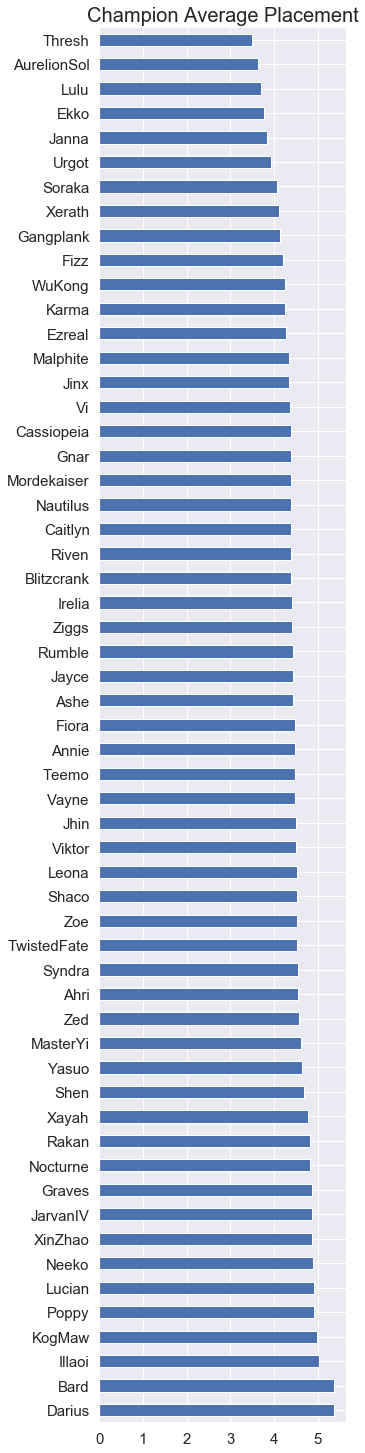

In [288]:
df_avg_place_noRound = df_avg_place['total'].drop('total').sort_values(ascending=False)
ax = df_avg_place_noRound.plot.barh(figsize=(5,20), fontsize=15)
ax.figure.tight_layout()
ax.set_title('Champion Average Placement', fontdict={'fontsize': 20 } )
ax

### I've posted [a long rant on reddit](https://www.reddit.com/r/CompetitiveTFT/comments/g68b6w/lets_talk_statistics_the_problem_with_databased/) explaining the problems with this approach, but to put it succinctly I believe those results are highly biased.

### It's no coicidence that all 5-cost champions rank so highly. Of course that is expected since they're designed to be more powerful, but you'll probably find it very hard to rationalize why Thresh is the best champion. From playing the game we know he isn't even a main carry and yet he places at the top of most tier lists. Furthermore, for another example, Lucian appears near the bottom, which is kinda crazy to me (*not only because he is my favorite champion, but c'mon, he's miles below effing Malphite whose only ability is to gain more HP*).

### The reason for that discrepancy becomes clear once we analyze the detailed count information, by round:





In [289]:
# Transforms a round (33) into a stage (4-5)
def round_to_stage(round):
    return f'{int((round + 9) / 7)}-{((round + 2) % 7 + 1)}'

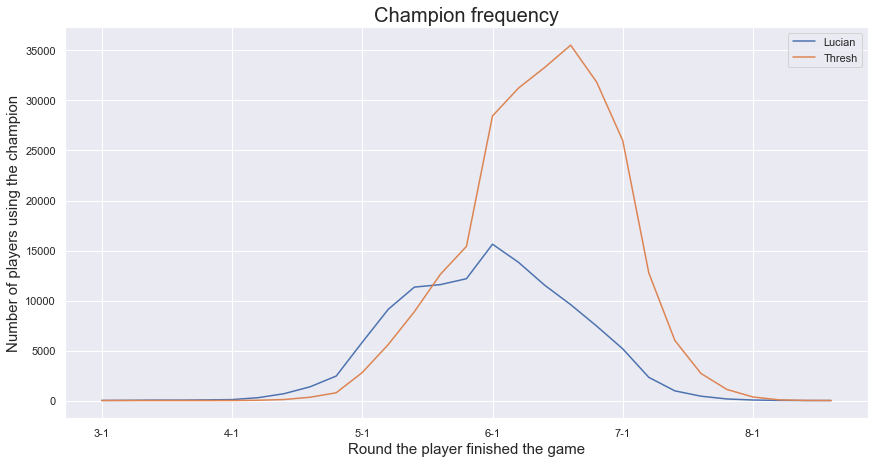

In [290]:
df_count_LucianAndThresh = df_count.loc[['Lucian', 'Thresh']].drop('total',axis=1).T
df_count_LucianAndThresh.index = pd.Series(df_count_LucianAndThresh.index).apply(lambda x: round_to_stage(int(x)))
ax = df_count_LucianAndThresh.plot(figsize=(12,6))
ax.figure.tight_layout()
ax.set_title('Champion frequency', fontdict={'fontsize': 20 } )
ax.set_xlabel('Round the player finished the game', fontdict={'fontsize': 15 } )
ax.set_ylabel('Number of players using the champion', fontdict={'fontsize': 15 } )
ax

### We can see that there's a clear difference between those two distributions, and it comes from the fact that Lucian is a 2-cost champion and can be found in early rounds, whereas getting a 5-cost Thresh only becomes feasible later on. You'd think this must be being considered when creating champion tier lists/rankings, but that's rarely the case.

### I could go on and on about this topic but I'll summarize my problem with current champion ranking approaches in two main points:

### 1) TFT, or more precisely the Auto Chess genre, is still a baby and people haven't figured out how to create stats for it yet, so they just replicate what they do with other game modes. However, while using placement is intuitive for ranking players, it doesn't work so well when ranking champions. The reason being a champion doesn't have a placement, the player does.

### 2) TFT is turn-based and the data should be treated as a time series. I believe the biggest issues arise from the fact that ranking-creators assume every piece of data lives inside the same point in time, which is not true. 


### I'll attempt to create a new type of ranking metric for champions that addresses those issues. The main difference is that I'll treat rounds as independent points in time. That means each column will be analyzed on its own.

In [303]:
#Champion placement relative to the average, by round
df_avg_place_relative = df_avg_place.copy()

champions = [x for x in df_avg_place_relative.index if not x == 'total']

for champion in champions:
    df_avg_place_relative.loc[champion] = df_avg_place_relative.loc['total'] - df_avg_place_relative.loc[champion]
    
df_avg_place_relative.head()

,12,13,14,16,17,19,20,21,23,24,26,27,28,30,31,33,34,35,37,38,40,41,42,44,45,47,48,49,51,total
Ahri,0.0,0.0,0.027911,-0.006024,0.0,-0.008000,-0.013874,-0.022216,-0.011005,-0.002629,-0.025198,-0.034887,-0.059688,-0.049383,-0.066547,-0.071503,-0.052856,-0.039109,-0.025370,-0.033692,-0.031076,-0.020749,-0.015924,0.009414,0.021044,0.061259,0.020833,0.020,NaN,-0.075044
Annie,0.0,0.0,-0.017544,-0.006024,0.0,0.013739,0.009747,-0.008889,-0.012105,0.005650,-0.009219,-0.006321,-0.007297,0.005350,0.004067,0.020032,-0.000616,-0.049146,-0.073181,-0.081824,-0.092158,-0.074071,-0.028960,-0.040822,0.007530,0.045216,-0.126225,NaN,NaN,-0.008352
Ashe,0.0,0.0,-0.017544,-0.006024,0.0,-0.008000,-0.015489,0.009555,0.006309,-0.002497,0.012124,0.007883,0.011783,0.016549,0.004195,0.001790,-0.006644,-0.019504,0.009954,0.012824,0.012084,0.019528,0.024303,0.025841,0.032836,0.020309,0.120833,-0.105,NaN,0.030561
AurelionSol,NaN,NaN,NaN,NaN,NaN,NaN,0.096772,-0.019341,0.031389,-0.011682,-0.021364,-0.013901,-0.012791,-0.020874,0.016729,0.050947,0.118851,0.169171,0.132201,0.095211,0.050900,0.033784,0.016662,0.016175,0.001270,-0.026679,0.020833,0.270,NaN,0.836948
Bard,0.0,0.0,0.046972,-0.006024,0.0,-0.001007,0.000208,0.002676,0.005952,-0.013377,0.000964,0.010681,0.032062,0.038521,0.045155,0.044116,0.005689,-0.032674,-0.040970,-0.043577,0.004243,-0.017410,-0.053948,-0.062839,0.064903,0.087233,-0.229167,-0.480,NaN,-0.891263


### The table tells us the total average placement by round, which can be treated as the expected placement of a player if he finishes the game on that round.  That is, we expect players that finish the game on round 40 to place at 1.84 on average.Then for each row we have the same statistic conditioned for the presence of a given unit in the comp *(here I'm using the term statistic [as used in Statistics](https://en.wikipedia.org/wiki/Statistic), which for me as a mathematician is as confusing as saying matplotlib.axes.Axes.axis... why couldn't they name it something else? well, anyhow, I digress...)*.

### We can then compare, for instance, if comps that include Lucian are performing better or worse than expected for that round. For instance, we can define the following metric, which is probably the most intuitive:

### Relative placement(Champion, Round) = Average Placement(Total, Round) - Average Placement(Champion, Round)

### Note: we just have to be careful here because the lower the average place the better, which can be counterintuitive. So the way I wrote the metric makes it so that the higher the relative placement the better.

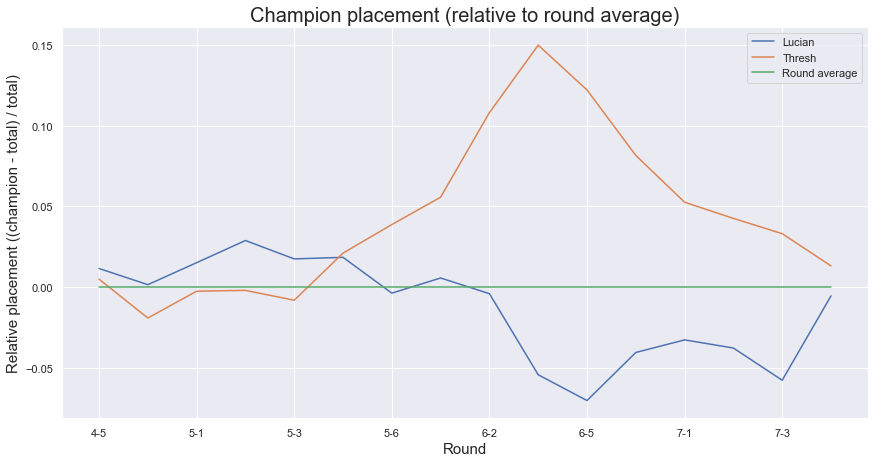

In [292]:
df_avg_place_relative_LucianAndThresh = df_avg_place_relative.loc[['Lucian', 'Thresh']]
df_avg_place_relative_LucianAndThresh = df_avg_place_relative_LucianAndThresh[[str(x) for x in range(23,45) if str(x) in df_avg_place_relative_LucianAndThresh.columns]].T
df_avg_place_relative_LucianAndThresh.index = pd.Series(df_avg_place_relative_LucianAndThresh.index).apply(lambda x: round_to_stage(int(x)))
df_avg_place_relative_LucianAndThresh['Round average'] = df_avg_place_relative_LucianAndThresh['Lucian'].apply(lambda x: 0)
df_avg_place_relative_LucianAndThresh
ax = df_avg_place_relative_LucianAndThresh.plot(figsize=(12,6))
ax.figure.tight_layout()
ax.set_title('Champion placement (relative to round average)', fontdict={'fontsize': 20 } )
ax.set_ylabel('Relative placement ((champion - total) / total)', fontdict={'fontsize': 15 } )
ax.set_xlabel('Round', fontdict={'fontsize': 15 } )
ax

### If you consider the current TFT meta, maybe you'll interpret Lucian's curve the same way as I did: He's a great early-game carry (we can see he starts performing above average) but, in late-game, players like to sell him and put his items on Jinx (or another carry) because she performs better. The players who can't find a two-star Jinx might keep the Lucian and finish 3rd or 2nd but not 1st, which reflects on a worse relative placement at the end.

### The problem is I still think Thresh's performance is being overestimated. He's good, but not that good. Similarly, Lucian might not the best late-game unit but I think he's better than his curve is telling us he is *(again, I'm not saying this because he's my favorite, I swear)*.

### The reason for that is quite simple: we haven't used the frequency information in our metric yet. We need to remember that very few people use Lucian late game so our sample size is very small at the end of the curve. I believe the champion relative placement should be weighted by their frequency on each round. Let's do that by creating a second metric:

### Weighted Relative placement(Champion, Round) = (Relative Placement(Champion, Round) * Count(Champion, Round)) / Count(Champion, Total)


In [298]:
#Champion placement relative to the average and weighted by their frequency, by round
df_avg_place_weighted_relative = df_avg_place_relative.copy()

champions = [x for x in df_avg_place_relative.index if not x == 'total']

for champion in champions:
    df_avg_place_weighted_relative.loc[champion] = df_avg_place_weighted_relative.loc[champion] * df_count.loc[champion]
    df_avg_place_weighted_relative.loc[champion] = df_avg_place_weighted_relative.loc[champion] / df_count['total'][champion]

df_avg_place_weighted_relative.head()

,12,13,14,16,17,19,20,21,23,24,26,27,28,30,31,33,34,35,37,38,40,41,42,44,45,47,48,49,51,total
Ahri,0.0,0.0,4.147625e-06,-6.510557e-07,0.0,-0.000004,-0.000020,-0.000078,-0.000075,-0.000033,-0.000854,-0.001918,-0.004458,-0.004143,-0.006052,-0.009334,-0.006373,-0.004322,-0.002503,-0.002641,-0.001716,-0.000515,-0.000177,0.000039,0.000031,0.000027,0.000003,2.701881e-07,NaN,-0.075044
Annie,0.0,0.0,-5.019487e-07,-3.878007e-07,0.0,0.000005,0.000011,-0.000025,-0.000070,0.000062,-0.000277,-0.000327,-0.000524,0.000446,0.000373,0.002703,-0.000078,-0.005629,-0.007362,-0.006416,-0.005018,-0.001737,-0.000311,-0.000160,0.000012,0.000022,-0.000015,NaN,NaN,-0.008352
Ashe,0.0,0.0,-1.308905e-06,-6.591833e-07,0.0,-0.000004,-0.000024,0.000036,0.000050,-0.000035,0.000420,0.000441,0.000827,0.001333,0.000364,0.000224,-0.000775,-0.002118,0.001000,0.001053,0.000730,0.000563,0.000312,0.000142,0.000069,0.000011,0.000015,-4.178024e-06,NaN,0.030561
AurelionSol,NaN,NaN,NaN,NaN,NaN,NaN,0.000010,-0.000008,0.000065,-0.000051,-0.000306,-0.000365,-0.000490,-0.001143,0.001094,0.005895,0.014856,0.022517,0.018286,0.011023,0.004583,0.001446,0.000333,0.000139,0.000004,-0.000026,0.000005,7.002847e-06,NaN,0.836948
Bard,0.0,0.0,1.822568e-05,-2.262005e-06,0.0,-0.000002,0.000001,0.000032,0.000122,-0.000410,0.000063,0.000954,0.003487,0.004255,0.004769,0.005543,0.000559,-0.002590,-0.002450,-0.001816,0.000111,-0.000191,-0.000234,-0.000109,0.000046,0.000015,-0.000011,-6.007885e-06,NaN,-0.891263


### This is the distribution of players records through rounds. Let's remember that a player is 'recorded' when they die or win the game, so what the curve is telling us is the distribution of player deaths through the rounds. For example, I would conclude based on the curve that the most common round players die in is 6-1.

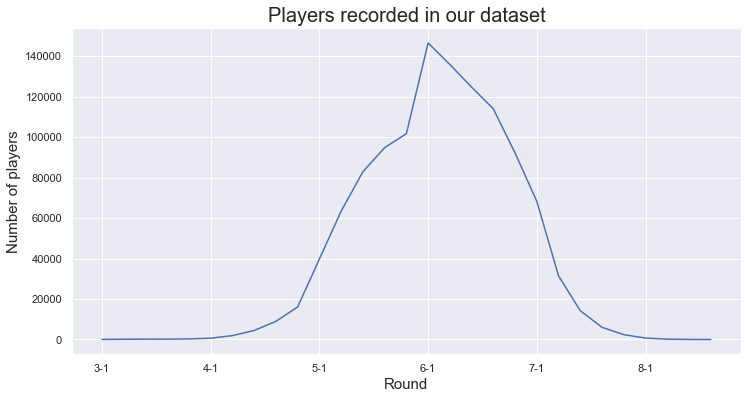

In [294]:
df_total_players = df_count.loc['total'].drop('total')
df_total_players.index = pd.Series(df_total_players.index).apply(lambda x: round_to_stage(int(x)))

ax = df_total_players.plot(figsize=(12,6))
ax.set_title('Players recorded in our dataset', fontdict={'fontsize': 20 } )
ax.set_ylabel('Number of players', fontdict={'fontsize': 15 } )
ax.set_xlabel('Round', fontdict={'fontsize': 15 } )
ax

### Here's the same Lucian and Thresh comparison with the new metric:

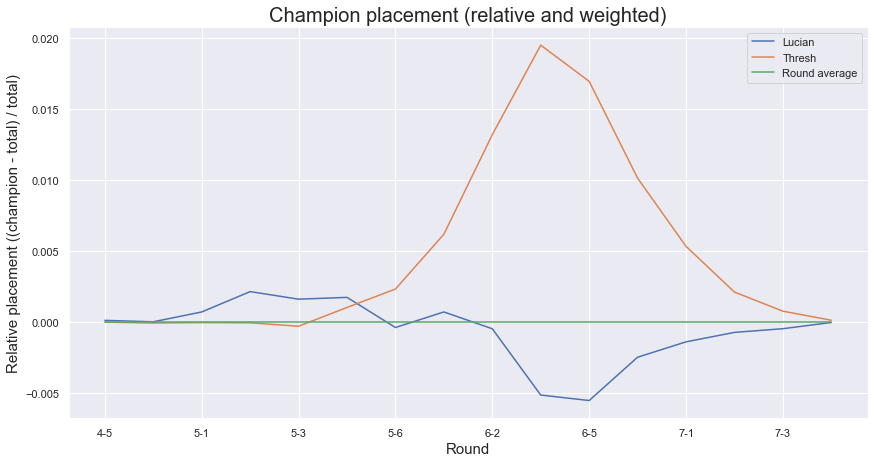

In [295]:
df_avg_place_relative_LucianAndThresh = df_avg_place_weighted_relative.loc[['Lucian', 'Thresh']]
df_avg_place_relative_LucianAndThresh = df_avg_place_relative_LucianAndThresh[[str(x) for x in range(23,45) if str(x) in df_avg_place_relative_LucianAndThresh.columns]].T
df_avg_place_relative_LucianAndThresh.index = pd.Series(df_avg_place_relative_LucianAndThresh.index).apply(lambda x: round_to_stage(int(x)))
df_avg_place_relative_LucianAndThresh['Round average'] = df_avg_place_relative_LucianAndThresh['Lucian'].apply(lambda x: 0)
df_avg_place_relative_LucianAndThresh
ax = df_avg_place_relative_LucianAndThresh.plot(figsize=(12,6))
ax.figure.tight_layout()
ax.set_title('Champion placement (relative and weighted)', fontdict={'fontsize': 20 } )
ax.set_ylabel('Relative placement ((champion - total) / total)', fontdict={'fontsize': 15 } )
ax.set_xlabel('Round', fontdict={'fontsize': 15 } )
ax

### Now there's a curve I can get on board with! But the big question remains, can we create a single Tier List to rank the champions based on this data? You might be tempted to just average it out and 'voilà!', but before you go and do that, I'm gonna tell you a story.

### You already know that Lucian is my favorite champion, but my close-second favorite is Darius. I was horrified by his position on current rankings, where he's usually appearing as the the worst *(Again, it's not because he's a favorite, but he's placing even below Bard!!! there's no way in hell that's accurate... have you seen a well-itemized darius go off? he can wipe out entire comps  all by himself)*.

### The thing is, I noticed he dropped to the bottom immediately after Set 3.5 was launched so I knew it had something to do with that. "*Maybe he became depressed after the retirement of his good old buddy Kassadin*," I thought to myself. So I decided to investigate.

### When we compare his timeline with Lucian's, we're able to see how they're completely different, even though they're both 2-cost units:

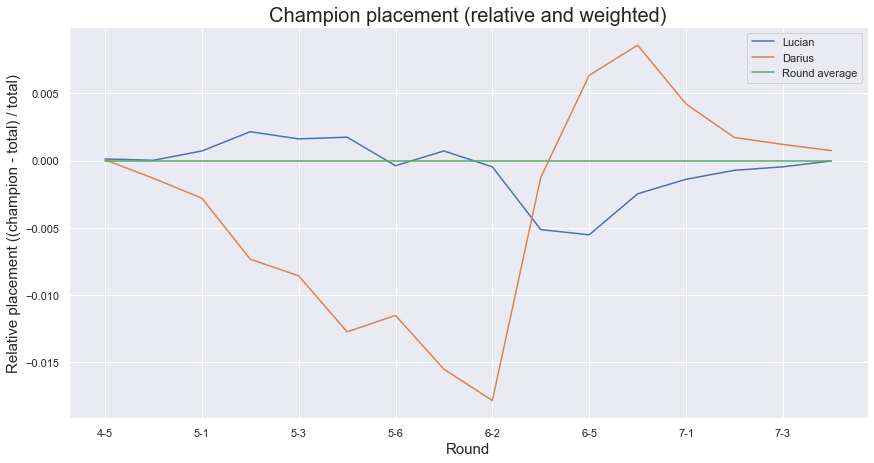

In [358]:
df_avg_place_relative_LucianAndThresh = df_avg_place_weighted_relative.loc[['Lucian', 'Darius']]
df_avg_place_relative_LucianAndThresh = df_avg_place_relative_LucianAndThresh[[str(x) for x in range(23,45) if str(x) in df_avg_place_relative_LucianAndThresh.columns]].T
df_avg_place_relative_LucianAndThresh.index = pd.Series(df_avg_place_relative_LucianAndThresh.index).apply(lambda x: round_to_stage(int(x)))
df_avg_place_relative_LucianAndThresh['Round average'] = df_avg_place_relative_LucianAndThresh['Lucian'].apply(lambda x: 0)
df_avg_place_relative_LucianAndThresh
ax = df_avg_place_relative_LucianAndThresh.plot(figsize=(12,6))
ax.figure.tight_layout()
ax.set_title('Champion placement (relative and weighted)', fontdict={'fontsize': 20 } )
ax.set_ylabel('Relative placement ((champion - total) / total)', fontdict={'fontsize': 15 } )
ax.set_xlabel('Round', fontdict={'fontsize': 15 } )
ax

### Without opening the data into more detailed features, we can only guess the reasons why his curve is like that, but at least one thing became clear to me: *it's dangerous to summarize champions' performance into a single average value*. 

### My interpretation of those curves is that Lucian is good in early-game but his performance falls off late-game, whereas Darius is the exact opposite. But when we just use the average, we're not able to see that and end up putting them both into the same box.

### So, in conclusion, I think that for now it's best to use the entire time series as a metric for measuring champion performance, ie,  use their weighted relative placement througout all rounds. In my opinion, the average placement by itself is not enough to create a trustworthy Tier List, and we would have to use more detailed features to do so (like including items, tier, traits, champion pairings etc).

In [410]:
df_count_percentage = df_count.copy()

for row in df_count_percentage.index:
    df_count_percentage.loc[row] = df_count_percentage.loc[row] / df_count_percentage.loc['total'] 
    
df_count_percentage = df_count_percentage.drop('total').T.drop('total').T

df_count_percentage = df_count_percentage[[str(x) for x in range(23,46) if str(x) in df_count_percentage.columns]]

df_count_percentage.columns = [round_to_stage(int(x)) for x in df_count_percentage.columns]

df_count_percentage.T

,Ahri,Annie,Ashe,AurelionSol,Bard,Blitzcrank,Caitlyn,Cassiopeia,Darius,Ekko,Ezreal,Fiora,Fizz,Gangplank,Gnar,Graves,Illaoi,Irelia,Janna,JarvanIV,Jayce,Jhin,Jinx,Karma,KogMaw,Leona,Lucian,Lulu,Malphite,MasterYi,Mordekaiser,Nautilus,Neeko,Nocturne,Poppy,Rakan,Riven,Rumble,Shaco,Shen,Soraka,Syndra,Teemo,Thresh,TwistedFate,Urgot,Vayne,Vi,Viktor,WuKong,Xayah,Xerath,XinZhao,Yasuo,Zed,Ziggs,Zoe
4-5,0.112585,0.090179,0.177461,0.035336,0.183257,0.133207,0.130755,0.208227,0.044811,0.039238,0.107346,0.185152,0.056515,0.041133,0.261732,0.063761,0.092966,0.198640,0.040241,0.149259,0.171887,0.170215,0.127411,0.242894,0.067217,0.215138,0.153383,0.070672,0.121168,0.102553,0.161186,0.282131,0.152268,0.044254,0.119385,0.180582,0.170215,0.052280,0.038011,0.139672,0.141233,0.112585,0.171776,0.036785,0.091963,0.059302,0.210122,0.231858,0.138781,0.274886,0.072344,0.030543,0.160852,0.105228,0.109464,0.046595,0.109687
4-6,0.116909,0.094857,0.176916,0.041682,0.151944,0.142937,0.136974,0.195801,0.043670,0.049820,0.116350,0.185303,0.064915,0.042800,0.275562,0.059697,0.091813,0.211765,0.042862,0.133308,0.172816,0.181513,0.130762,0.236241,0.070816,0.214747,0.152131,0.080258,0.119953,0.105168,0.152317,0.273512,0.139645,0.051373,0.113989,0.165238,0.188533,0.053361,0.039632,0.141446,0.153435,0.120388,0.181265,0.048329,0.097403,0.060815,0.217108,0.249907,0.148590,0.296186,0.066778,0.040067,0.143993,0.104361,0.110511,0.044664,0.115604
5-1,0.126080,0.105503,0.175176,0.055528,0.130704,0.152236,0.133618,0.202437,0.034497,0.066281,0.132487,0.187814,0.076935,0.057136,0.291985,0.053920,0.087563,0.222814,0.058769,0.119598,0.167111,0.182136,0.148869,0.247940,0.069548,0.202286,0.146482,0.107236,0.124523,0.109975,0.147889,0.267714,0.130427,0.046834,0.094523,0.152060,0.211759,0.065050,0.039799,0.140503,0.180578,0.129447,0.186809,0.070402,0.099573,0.074196,0.211131,0.263467,0.169950,0.325050,0.063543,0.050276,0.131658,0.108141,0.117839,0.055302,0.121608
5-2,0.128346,0.113968,0.177219,0.063818,0.112549,0.164938,0.136024,0.194671,0.031578,0.084030,0.149551,0.186458,0.086930,0.063219,0.309475,0.054280,0.087277,0.226580,0.070377,0.104178,0.167965,0.184376,0.162589,0.246776,0.069983,0.202318,0.143907,0.126565,0.133139,0.103863,0.147296,0.267492,0.115324,0.044963,0.084834,0.133643,0.213653,0.070550,0.041290,0.130333,0.188081,0.132918,0.191834,0.088397,0.103815,0.082989,0.213984,0.280514,0.176825,0.339555,0.060177,0.059404,0.114741,0.101167,0.113243,0.058537,0.124358
5-3,0.133330,0.121054,0.170136,0.071296,0.104797,0.175948,0.138178,0.197849,0.027665,0.097960,0.162478,0.186066,0.095041,0.071163,0.319240,0.053629,0.086177,0.226514,0.082258,0.092388,0.167857,0.179783,0.170618,0.252647,0.071851,0.193857,0.136755,0.149393,0.136249,0.098502,0.149345,0.266612,0.101879,0.044886,0.077724,0.120016,0.219676,0.076518,0.041895,0.125383,0.201515,0.138033,0.190890,0.107077,0.108234,0.092183,0.212115,0.290393,0.189009,0.353284,0.056258,0.070886,0.100589,0.095053,0.108174,0.059743,0.126324
5-5,0.130961,0.122767,0.170832,0.089054,0.093072,0.187177,0.140536,0.198165,0.023136,0.124771,0.174533,0.177539,0.100074,0.081662,0.337235,0.051482,0.087388,0.220922,0.102594,0.080312,0.168966,0.181504,0.183444,0.257334,0.072245,0.188485,0.122219,0.181356,0.143942,0.091100,0.150111,0.274955,0.088010,0.044596,0.069082,0.107023,0.214141,0.078825,0.042887,0.115407,0.211515,0.136718,0.196299,0.133122,0.106148,0.112591,0.209048,0.298756,0.190225,0.364378,0.051176,0.085163,0.088084,0.087736,0.103427,0.059960,0.125488
5-6,0.132318,0.125900,0.171471,0.099140,0.082925,0.196413,0.144651,0.194565,0.018083,0.138588,0.186605,0.177298,0.107317,0.085961,0.346410,0.048892,0.084664,0.220962,0.109891,0.072694,0.164798,0.180856,0.191391,0.258149,0.071898,0.186124,0.119719,0.199479,0.149673,0.086443,0.148582,0.274326,0.079603,0.044165,0.063899,0.098285,0.217807,0.082433,0.042475,0.110599,0.218328,0.138598,0.195342,0.151481,0.107533,0.114550,0.209149,0.308918,0.195243,0.376669,0.048745,0.092222,0.078866,0.082581,0.100604,0.061520

In [412]:
import bar_chart_race as bcr
df = bcr.load_dataset('covid19_tutorial')
bcr.bar_chart_race(df)

Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            Requested MovieWriter (ffmpeg) not available
                            